In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm
%matplotlib inline

# Let's go through some basic functions in statsmodels

But first, let's generate some data

In [4]:
white_noise = np.random.normal(size=1000)

In [120]:
Z = np.random.normal(size=1001)

theta = 0.9
ma_1 = Z[1:]+theta*Z[:-1]

In [181]:
ar_1 = [np.random.normal()]
phi = 0.33
for i in range(999):
    d = np.random.normal()
    ar_1.append(phi*ar_1[i]+d)

In [182]:
df_data = pd.DataFrame(data={'wn': white_noise, 'ma': ma_1, 'ar': ar_1})

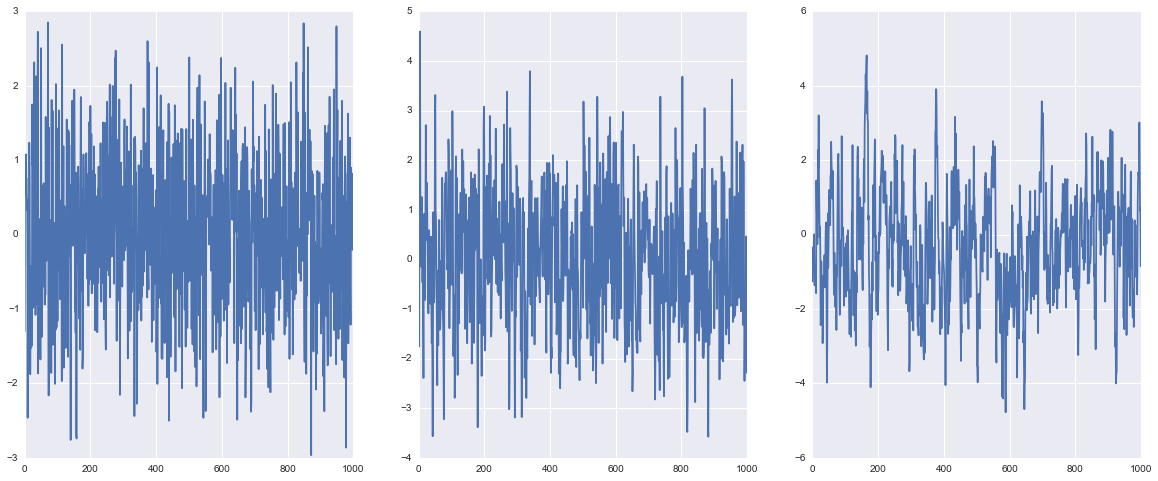

In [123]:
fig, axs = plt.subplots(1,3)

df_data.wn.plot(ax=axs[0], figsize=(20,8))
df_data.ma.plot(ax=axs[1])
df_data.ar.plot(ax=axs[2])

## Autocorrelation Function

The ACF is a great tool for diagnosis and identification of different models. These types of models all have slightly differing ACFs

In [124]:
df_acf = pd.DataFrame(data={'wn': acf(df_data.wn), 'ma': acf(df_data.ma), 'ar': acf(df_data.ar)})

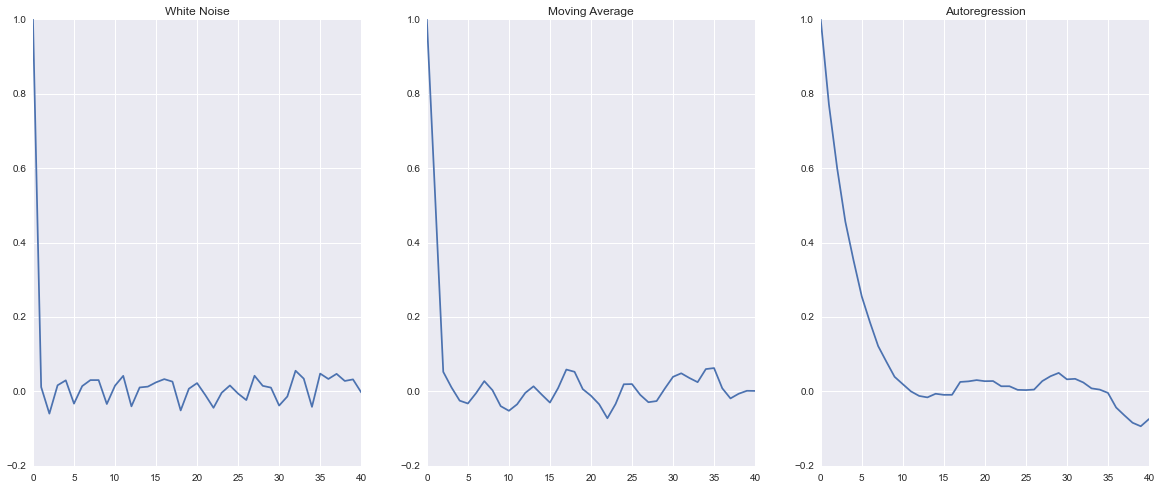

In [125]:
fig, axs = plt.subplots(1,3)

df_acf.wn.plot(ax=axs[0], title="White Noise",figsize=(20,8))
df_acf.ma.plot(ax=axs[1], title="Moving Average")
df_acf.ar.plot(ax=axs[2], title = "Autoregression")

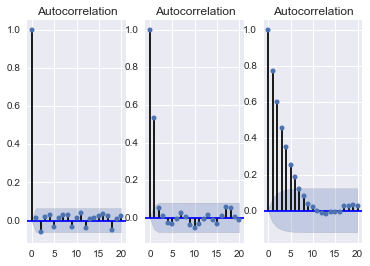

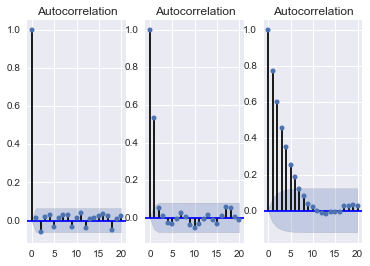

In [126]:
from statsmodels.graphics.tsaplots import plot_acf
fig, axs = plt.subplots(1,3)

plot_acf(df_data.wn,lags=20,ax=axs[0])
plot_acf(df_data.ma,lags=20,ax=axs[1])
plot_acf(df_data.ar,lags=20,ax=axs[2])

### Now that we understand the _very_ basics, let's try it on some real data

In [74]:
df = pd.read_csv('../../data/WINE.DAT', header=None)
df.columns = ['sales']
df.index = (pd.date_range(start='1/1/1980', end='10/1/1991', freq='MS'))
df.head()

,sales
1980-01-01,464
1980-02-01,675
1980-03-01,703
1980-04-01,887
1980-05-01,1139


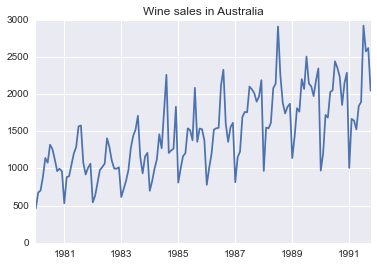

In [75]:
df.sales.plot(title="Wine sales in Australia")

Data doesn't look stationary - it seems that the variance is blowing up in later years. Let's transform the data to reduce this problem

In [76]:
df['log_sales'] = np.log(df.sales)

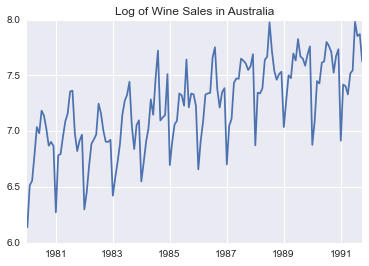

In [77]:
df.log_sales.plot(title="Log of Wine Sales in Australia")

Looks like the data has a seasonal and a trend component. Let's decompose the data into a trend, and seasonal component

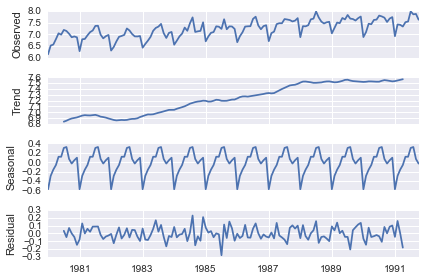

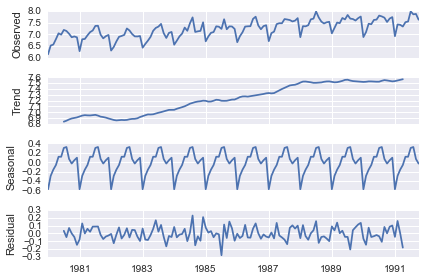

In [78]:
decomp = sm.tsa.seasonal_decompose(df.log_sales)
decomp.plot()

In [79]:
decomp.resid.head(20)

1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.034342
1980-08-01   -0.046985
1980-09-01    0.070822
1980-10-01    0.000873
1980-11-01   -0.045218
1980-12-01   -0.146153
1981-01-01   -0.077343
1981-02-01    0.129409
1981-03-01    0.000414
1981-04-01    0.060501
1981-05-01    0.021898
1981-06-01    0.088373
1981-07-01    0.089110
1981-08-01    0.089809
Freq: MS, Name: log_sales, dtype: float64

In [80]:
residuals = decomp.resid.dropna()

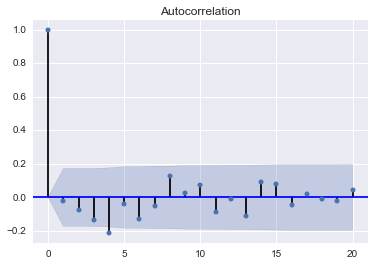

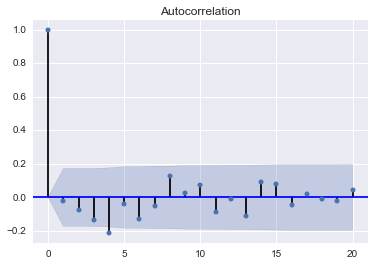

In [58]:
plot_acf(residuals,lags=20)

In [68]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [90]:
acorr_results = acorr_ljungbox(residuals,lags=20)
acorr_results

(array([  0.05995533,   0.76635167,   3.12798236,   9.13952849,
          9.32553883,  11.65946979,  12.01891807,  14.40440442,
         14.52099179,  15.33357069,  16.47698576,  16.49343669,
         18.34951674,  19.5306164 ,  20.52586729,  20.85351725,
         20.92295677,  20.93873503,  20.99843623,  21.28054905]),
 array([ 0.80656655,  0.68169302,  0.37231063,  0.057705  ,  0.09676305,
         0.07001131,  0.09993845,  0.0718149 ,  0.10496205,  0.12036545,
         0.12432622,  0.16966618,  0.14469374,  0.14564805,  0.15267409,
         0.1842102 ,  0.22975545,  0.28251521,  0.33688732,  0.38078823]))

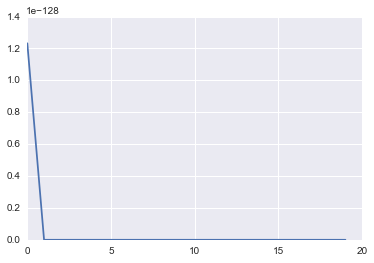

In [89]:
plt.plot(acorr_results[1])

In [97]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import arma_order_select_ic

In [127]:
r = arma_order_select_ic(df_data.ma.values)
r

{'bic':              0            1            2
 0  3394.135493  2798.924329  2805.379327
 1  3071.438465  2805.326079  2811.511254
 2  2972.602096  2809.793645  2815.795161
 3  2930.628467  2816.286921  2822.934180
 4  2896.467084  2823.194443  2829.781578, 'bic_min_order': (0, 1)}

In [198]:
r = arma_order_select_ic(residuals, fit_kw= {'method' : 'css'})
r

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

{'bic':             0           1           2
 0 -161.997685 -242.110626 -237.272433
 1 -187.139754 -232.608227 -234.277088
 2 -190.371873 -221.108494 -224.703428
 3 -186.651325 -226.456372 -215.956909
 4 -190.479682 -221.667268 -214.410218, 'bic_min_order': (0, 1)}

In [205]:
wine_arma = sm.tsa.ARMA(residuals, order=(1,1)).fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [206]:
r = arma_order_select_ic(np.diff(residuals), fit_kw= {'method' : 'css'})
r

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

{'bic':             0           1           2
 0 -161.997685 -242.110626 -237.272433
 1 -187.139754 -232.608227 -234.277088
 2 -190.371873 -221.108494 -224.703428
 3 -186.651325 -226.456372 -215.956909
 4 -190.479682 -221.667268 -214.410218, 'bic_min_order': (0, 1)}

In [212]:
wine_arma = sm.tsa.ARIMA(residuals, order=(0,1,1)).fit()
print wine_arma.params

const                0.000016
ma.L1.D.log_sales   -0.999964
dtype: float64


In [297]:
prediction = wine_arma.predict('1989-01-01', '1991-01-01', dynamic=True)
prediction.head()

1989-01-01    0.098624
1989-02-01    0.000016
1989-03-01    0.000016
1989-04-01    0.000016
1989-05-01    0.000016
Freq: MS, dtype: float64

In [298]:
full_pred = np.exp(decomp.trend+decomp.seasonal+prediction).dropna()
full_pred.tail()

1990-09-01    2050.259674
1990-10-01    1847.896203
1990-11-01    1967.410171
1990-12-01    2062.417469
1991-01-01    1051.871483
Freq: MS, dtype: float64

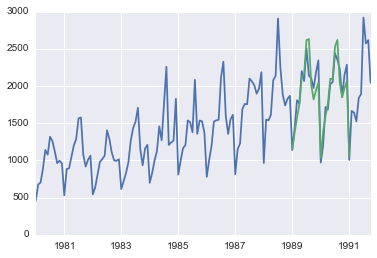

In [417]:
df.sales.plot()
full_pred.plot()

The above is fine, but with this approach we can't actually forecast into the future. Perhaps Diffs will help us

#### Let's try to forecast, but this time using differencing

In [418]:
wine_diff = np.log(df.sales).diff(periods=12).dropna()

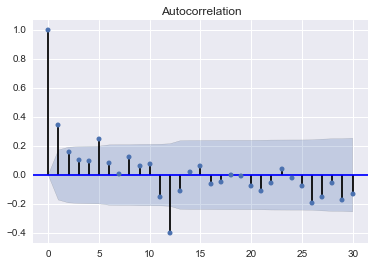

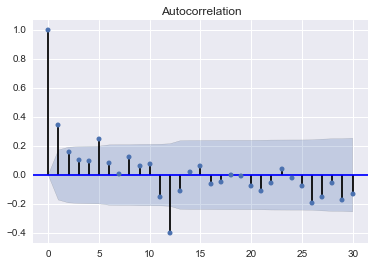

In [419]:
plot_acf(wine_diff, lags=30)

In [302]:
arma_order_select_ic(wine_diff)

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


{'bic':             0           1           2
 0 -123.859026 -133.087275 -130.243597
 1 -135.504906 -131.089406 -127.419855
 2 -130.946065 -127.254736 -124.229162
 3 -126.313924 -122.662410 -120.141306
 4 -121.740631 -118.446362 -115.319176, 'bic_min_order': (1, 0)}

In [303]:
wine_model = ARMA(wine_diff, order=(1,0)).fit()
wine_model.params

const          0.068522
ar.L1.sales    0.344317
dtype: float64

In [413]:
predictions_diff = wine_model.predict('1989-01-01', '1995-01-01')
df_pred = pd.DataFrame(data={
                             'prediction_diff':predictions_diff, 
                             'forecast': df.log_sales.loc[predictions_diff.index.shift(-12)].values})

In [414]:
for i, d in enumerate(df_pred.index):
    if i < 12:
        df_pred.forecast.iloc[i] = df_pred.forecast.iloc[i] + df_pred.prediction_diff.iloc[i]
    else:
        df_pred.forecast.iloc[i] = df_pred.forecast.iloc[i-12]+ df_pred.prediction_diff.iloc[i]

In [415]:
df_pred.head()

,forecast,prediction_diff
1989-01-01,6.863964,-0.009200
1989-02-01,7.446715,0.101350
1989-03-01,7.355644,0.017406
1989-04-01,7.486039,0.100808
1989-05-01,7.714921,0.075759


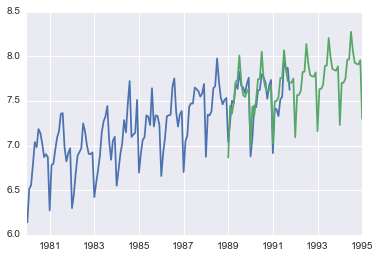

In [420]:
df.log_sales.plot()
df_pred.forecast.plot()

In [421]:
from statsmodels.tsa.x13 import x13_arima_select_order

In [422]:
x13_arima_select_order(df.log_sales)

X13NotFoundError: x12a and x13as not found on path. Give the path, put them on PATH, or set the X12PATH or X13PATH environmental variable.